# Predefined filters

In [3]:
from scipy import signal
import numpy as np
import matplotlib
from matplotlib import pyplot

np.seterr(divide = 'ignore');

In [1]:
from openbci_stream.preprocess.eeg_filters import notch60, band330, band545, FiltersChain
from openbci_stream.acquisition import CytonRFDuino as Device
import time
import numpy as np

openbci = Device()
openbci.collect(5)
time.sleep(0.1)

data = np.array(openbci.eeg_buffer.queue)

Filter can be used as `filter(data)` it will return the data filtered.

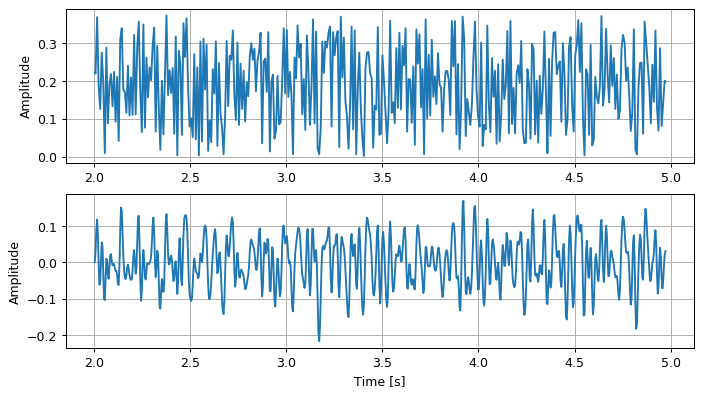

In [26]:
pyplot.figure(figsize=(9, 5), dpi=90)

eeg = np.stack(data[:,1])
timestamp = list(data[:,-1])

t = np.linspace(0, eeg.shape[0]/openbci.sample_rate, eeg.shape[0])[500:5000]
eeg = eeg[500:5000]

filtered_data = notch60(eeg, timestamp=timestamp)
filtered_data = band330(filtered_data, timestamp=timestamp)

pyplot.subplot(211)
pyplot.plot(t, eeg[:,0])
pyplot.grid(True)
pyplot.ylabel('Amplitude')

pyplot.subplot(212)
pyplot.plot(t, filtered_data[:,0])
pyplot.grid(True)
pyplot.xlabel('Time [s]')
pyplot.ylabel('Amplitude')

pyplot.show()

A sequence of filter can be chained with `FiltersChain`

In [17]:
filter_ = FiltersChain(notch60, band330)
filtered_data = filter_(eeg)

## Filters for brain waves ##

In [21]:
from openbci_stream.preprocess.eeg_filters import alpha, beta, delta, theta

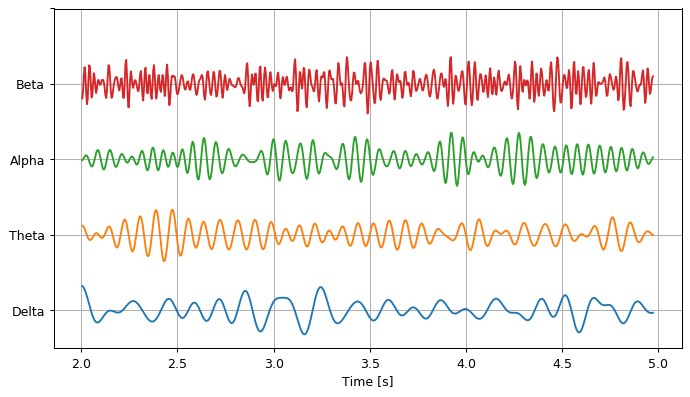

In [28]:
pyplot.figure(figsize=(9, 5), dpi=90)

for i, filter_ in enumerate([delta, theta, alpha, beta]):
    eeg_ = filter_(eeg, timestamp=timestamp)
    eeg_ = eeg_/(eeg_.max()-eeg_.min())
    pyplot.plot(t, eeg_[:,0]+i)
    
pyplot.grid(True)
pyplot.yticks(range(5), ['Delta', 'Theta', 'Alpha', 'Beta'])
pyplot.xlabel('Time [s]')

pyplot.show()

## Auto-compiled filters

The main acquisition module return EEG data with a `timestamp` vector, this means that the **frequency sample is not constant**, so the precompiled filter will not be suitable for all samples, this can be solved by adding extra arguments to the filters methods, this argument can be the timestamp or the frequency sample, all filters are precompiled for `250 Hz`.

In [29]:
import logging
logging.getLogger().setLevel(logging.INFO)

from openbci_stream.preprocess.eeg_filters import notch60, band1100

eeg = np.stack(data[:,1])

Frequency sample calculated from the timestamp:

In [36]:
notch60(eeg, timestamp=timestamp);

Frequency sample set explicitly:

In [31]:
notch60(eeg) # frequency sample: 250 Hz
notch60(eeg, fs=500) # frequency sample: 500 Hz
notch60(eeg, fs=200); # frequency sample: 200 Hz

INFO:root:Compiled `Notch` filter for 501.05 Hz
INFO:root:Compiled `Notch` filter for 200.53 Hz


These parameters are memorized, so they're not compiled again just reused.

In [32]:
notch60(eeg, fs=500)
notch60(eeg, fs=200);

Filters are not compiled for each frequency sample, near values (based in a logarithmic space) are reused.

In [33]:
notch60(eeg, fs=1000);
notch60(eeg, fs=1001);
notch60(eeg, fs=1002);

INFO:root:Compiled `Notch` filter for 1003.16 Hz
